# Backpropagation intro
### Credit 

This code is based on __Siraj Raval__'s repository.

https://github.com/llSourcell/how_to_do_math_for_deep_learning

### Overview

This is the code for this video on Youtube by Siraj Raval apart of the 'Intro to Deep Learning' Udacity nanodegree course. We build a 3 layer feedforward neural network trains on a set of binary number input data and predict the binary number output.

### Dependencies

Python 3.5.2 + Jupyter notebook + Numpy + Matplotlib

### Usage

You can run the notebook by typing `jupyter notebook` into terminal / cmd when in the directory.

## Step 1 Collect Data

Our goal is to find weights which translates rows of x (inputs) to rows of y (outputs). 

For example:

<img src="img/dnn2.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([[0,2,1],
              [0,-0.8,1],
              [-1,0,2],
              [-1,1,2]])
                
y = np.array([[0.2],
              [0.9],
              [0.8],
              [0.1]])

print("\n x:") 
print(x)
print("\n y:") 
print(y)



 x:
[[ 0.   2.   1. ]
 [ 0.  -0.8  1. ]
 [-1.   0.   2. ]
 [-1.   1.   2. ]]

 y:
[[ 0.2]
 [ 0.9]
 [ 0.8]
 [ 0.1]]


## Step 2 build model

<img src="img/dnn1.png">

In [2]:
num_epochs = 600

#initialize weights
weight0 = 2 * np.random.random((3,4)) - 1
weight1 = 2 * np.random.random((4,1)) - 1

print("\n weight0:") 
print(weight0)
print("\n weight1:") 
print(weight1)



 weight0:
[[ 0.80555626  0.32886314  0.63546101 -0.09850212]
 [ 0.56899505  0.99193603  0.80095678  0.65995349]
 [ 0.09303487 -0.51942573 -0.43188755 -0.11057207]]

 weight1:
[[-0.21223736]
 [ 0.30798958]
 [ 0.98069744]
 [ 0.82357776]]


## Sigmoid - activation function

## $f(x) = \frac{1}{1+e^{-x}}$

In [3]:
def nonlin(x):
    return x*(1-x)
def sigmoid(x):
    return 1/(1+np.exp(-x))

## Step 3 Train Model


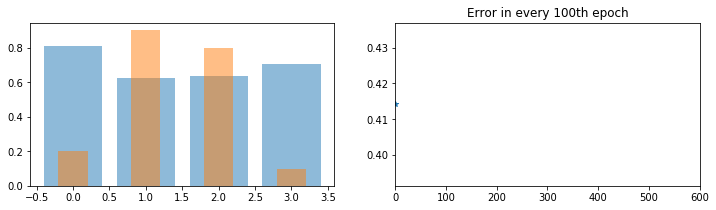

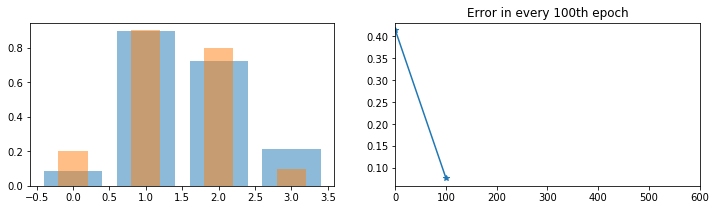

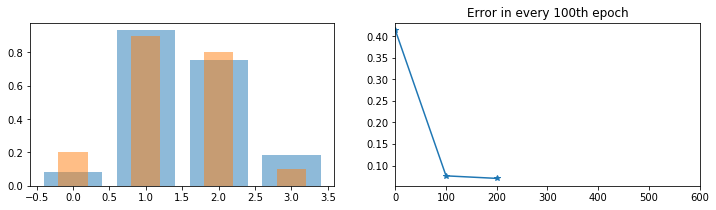

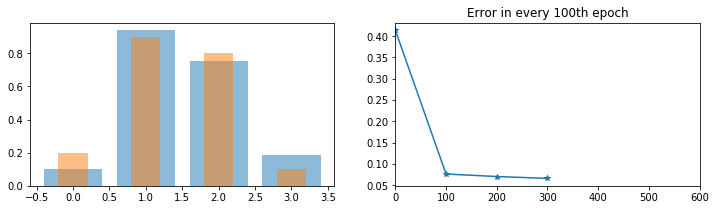

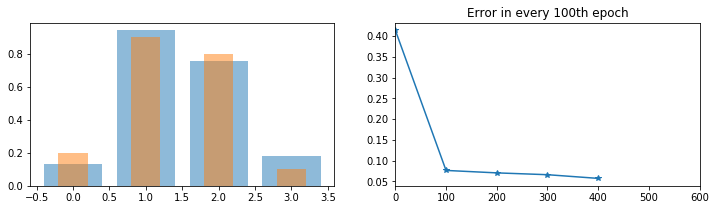

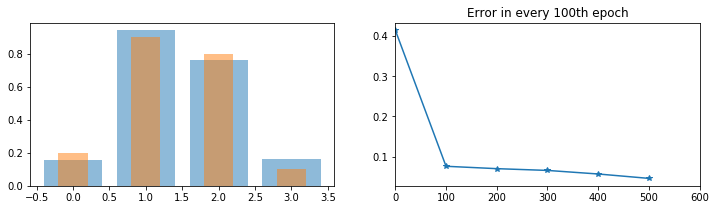

In [4]:
mean_err = [] #

for j in range(num_epochs):
    #feed forward through layers 0,1, and 2
    layer0 = x
    layer1 = sigmoid(np.dot(layer0, weight0))
    layer2 = sigmoid(np.dot(layer1, weight1))
    
    #how much did we miss the target value?
    l2_error = y - layer2
    
    if (j % 100) == 0:
        # print("Error: " + str(np.mean(np.abs(l2_error))))
        mean_err = np.append(mean_err, np.mean(np.abs(l2_error)))
        # print(weight0)
        # print(weight1)
        fig, axes = plt.subplots(1, 2, figsize=(12,3))
        axes[0].bar(np.array([0,1,2,3]), np.array(layer2),  alpha=0.5)
        axes[0].bar(np.array([0,1,2,3]), np.array(y),  alpha=0.5, width=0.4)
        axes[1].set_title("y and layer2")
        axes[1].plot(np.arange(mean_err.shape[0])*100, mean_err, '*-')
        axes[1].set_xlim([0, num_epochs])
        axes[1].set_title("Error in every 100th epoch")

            
    #in what direction is the target value?
    l2_delta = l2_error * nonlin(layer2)
    
    #how much did each layer1 value contribute to layer2 error
    l1_error = l2_delta.dot(weight1.T)
    
    l1_delta= l1_error * nonlin(layer1)
    
    weight1 += layer1.T.dot(l2_delta)
    weight0 += layer0.T.dot(l1_delta)

Desired output(y):
 [[ 0.2]
 [ 0.9]
 [ 0.8]
 [ 0.1]] 

Result output(layer2):
 [[ 0.1726325 ]
 [ 0.94032287]
 [ 0.77056329]
 [ 0.14932392]] 

weight0 (weight):
 [[ 0.79360699  0.18628251  1.29294532  0.01599572]
 [ 3.42282069  2.87552715  0.4082887  -2.02987748]
 [-0.30703166 -0.44580443  0.01459373  0.29607214]] 

weight1 (weight):
 [[-1.98459591]
 [-1.3034196 ]
 [ 2.38677219]
 [ 2.19795088]]


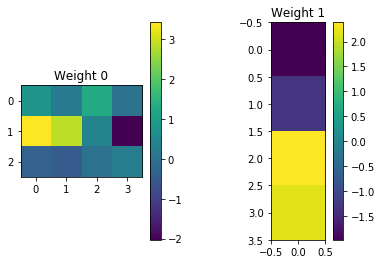

In [5]:
print('Desired output(y):\n', y, '\n\nResult output(layer2):\n', layer2, '\n')
print('weight0 (weight):\n', weight0, '\n')
print('weight1 (weight):\n', weight1)

plt.subplot(1, 2, 1)
plt.imshow(weight0)
plt.title('Weight 0')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(weight1)
plt.title('Weight 1')
plt.colorbar()
plt.show()